# support vector machine
- svm sort based on the idea of finding a hyperplane that best divides  a dataset into two classes
- used for both classification and regression models

# hyper plane
- a hyperplane is aline that linearly seperates and classifies a set of data.

# How to find right hyper plane
- the distance b/w the hyper plane and the nearest data point from either set is known as margin.
- svm goal is to choose a hyper plane with greatest margin b/w the hyperplane and any point.

# SVM Formula
### Basic Formula
- Yi=b0+b1*Xi

### For all Xi values
- if Yi=-1,b1*Xi+b0  <=  -1(belongs to negative class)
- if Yi=+1,b1*Xi+b0  >=  +1(belongs to positive class)

### For all SVM data points which decides the margin
- b1*Xi+b0=-1,here Xi is negative SV(Support Vectors) and Yi is -1
- b1*Xi+b0=+1,here Xi is positive SV(Support Vectors) and Yi is +1

### Decision Boundary
- Yi*(b1 * Xi+b0)=0

### To maximize width(W)
- W=(('X+' - 'X-')*b1) / |b1|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [4]:
X,Y=make_blobs(n_samples = 500,centers=2,random_state=0,cluster_std=0.40)
X

array([[ 7.37744463e-01,  4.28276041e+00],
       [ 2.12883772e+00,  7.43467756e-01],
       [ 8.16490467e-01,  4.45180968e+00],
       [ 1.66935855e+00,  4.57758777e+00],
       [ 2.43954488e+00,  1.42928880e+00],
       [ 1.16152221e+00,  4.41542563e+00],
       [ 5.25539755e-01,  4.01151623e+00],
       [ 7.90831689e-01,  4.49637992e+00],
       [ 2.38339624e+00,  1.44164308e+00],
       [ 2.05475970e+00,  4.27421746e+00],
       [ 5.62572942e-01,  4.57642513e+00],
       [ 6.54906213e-01,  4.02796742e+00],
       [ 2.73913845e-01,  4.48416111e+00],
       [ 2.90198393e+00,  2.53312299e-01],
       [ 9.91722299e-01,  3.64110129e+00],
       [ 1.95845959e+00,  1.50496813e+00],
       [ 9.69997234e-01,  4.36815859e+00],
       [ 1.40229820e+00,  8.70809998e-01],
       [ 2.06369233e+00,  9.37445443e-01],
       [ 1.04293948e+00,  4.55779990e+00],
       [ 8.37105219e-01,  4.36632692e+00],
       [ 1.78818243e+00,  1.57043236e+00],
       [ 2.25474363e+00,  1.31685252e+00],
       [ 7.

In [5]:
Y

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

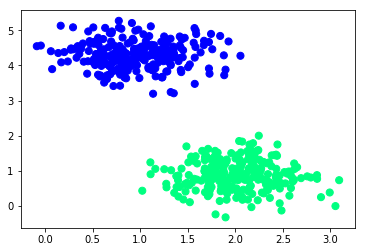

In [12]:
plt.scatter(X[:,0],X[:,1],c = Y,s=50,cmap='winter')
plt.show()

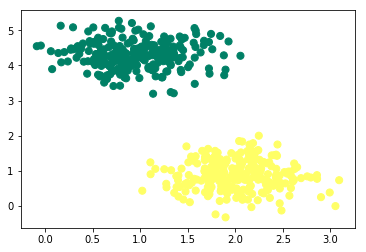

In [13]:
plt.scatter(X[:,0],X[:,1],c = Y,s=50,cmap='summer')
plt.show()

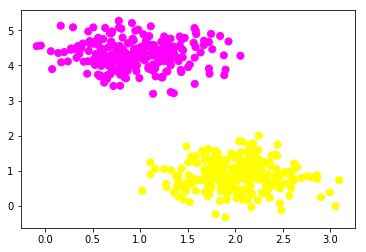

In [14]:
plt.scatter(X[:,0],X[:,1],c = Y,s=50,cmap='spring')
plt.show()

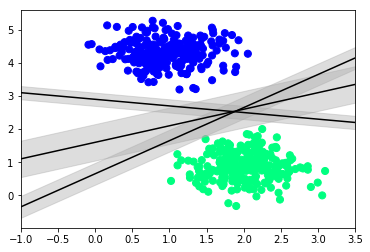

In [29]:
x1=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c = Y,s=50,cmap='winter')
for m, b, d in[(1,0.65,0.33),
              (0.5,1.6,0.55),
              (-0.2,2.9,0.2)]:
    y1=m * x1 + b
    plt.plot(x1,y1,'black')
    plt.fill_between(x1,y1 - d,y1 + d,edgecolor='none',color='#AAAAAA',alpha=0.4)
plt.xlim(-1,3.5);
plt.show()


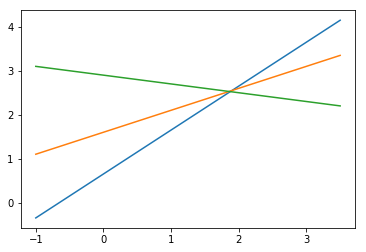

In [18]:
for m, b, d in[(1,0.65,0.33),
              (0.5,1.6,0.55),
              (-0.2,2.9,0.2)]:
    y1=m * x1 + b
    plt.plot(x1,y1)
    